# Wavelength Loss dependence using BraggExact

Here for the N2 configuration from Bird.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from scipy.optimize import newton

# Initialize

In [13]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [14]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ts = [15*2.7183333333333333e-6, 10e-6,
      15*2.7183333333333333e-6, 10e-6, 15*2.7183333333333333e-6]

mats = ['air', 'glass', 'air', 'glass', 'air']
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x:n_glass, lambda x:n_air]
maxhs = [100,100,100,100,100]
scale=15e-6




# Four Layer Study: Glass outside Air (Outside Cladding)

In [15]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs, wl=wl, scale=scale)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low) +0*1j
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess = 1/.999999 * guess.real + imag * 1j
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag  # set current imaginary part as guess for next one
                flag=False
        except RuntimeError:
            guess = .999999 * guess.real + 1j * imag
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (67.33280465337657-1.3842981420896257e-08j) . Residual of determinant:  3.791612986434471e-07 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.23672187801269-1.0423926755687613e-08j) . Residual of determinant:  6.075810613451644e-08 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.14091458236472-8.142178914683323e-09j) . Residual of determinant:  6.47189343966229e-07 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (67.04538117374484-6.567307095713462e-09j) . Residual of 

Scaled beta:  (64.47656878266365-7.070516521271417e-08j) . Residual of determinant:  1.3815511914872252e-09 


     --------------------  33/301: wavelength: 1.4639999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.38843551803937-1.1865395681504448e-07j) . Residual of determinant:  7.75951676462885e-09 


     --------------------  34/301: wavelength: 1.466e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.30053212519469-2.1762819065930376e-07j) . Residual of determinant:  3.4601090328675643e-09 


     --------------------  35/301: wavelength: 1.468e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (64.2128513306851-4.4959715626176003e-07j) . Residual of determinant:  8.987422051451739e-10 


     --------------------  36/301: wavelength: 1.47e-06  --------------

scaling guess: 1
Scaled beta:  (61.853219014795044-4.153982819107543e-09j) . Residual of determinant:  1.9622786914287085e-07 


     --------------------  64/301: wavelength: 1.5259999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.7721301674227-3.9920725654884295e-09j) . Residual of determinant:  9.79604410855769e-09 


     --------------------  65/301: wavelength: 1.528e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (61.69125367602553-3.886362234799162e-09j) . Residual of determinant:  4.124162605349714e-07 


     --------------------  66/301: wavelength: 1.53e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.61058866534158-3.831458183183497e-09j) . Residual of determinant:  5.068093980369207e-07 


     --------------------  67/301: wavelength: 1.532e-06  --------------------     

Boundary names not prov

Scaled beta:  (59.358611851867806-5.291017152638527e-05j) . Residual of determinant:  3.129656734014078e-11 


     --------------------  96/301: wavelength: 1.59e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
Scaled beta:  (59.288675363503565-0.0005360399669073129j) . Residual of determinant:  4.906156941399417e-12 


     --------------------  97/301: wavelength: 1.592e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (59.214436744823345-0.00032760463053799937j) . Residual of determinant:  3.6600610241552066e-13 


     --------------------  98/301: wavelength: 1.594e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (59.13812711446469-6.318357424103287e-05j) . Residual of determinant:  2.9900619630496524e-11 


     ---------

scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (57.12886818360845-5.6948314607531824e-09j) . Residual of determinant:  1.3254034573602325e-07 


     --------------------  127/301: wavelength: 1.652e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (57.059682058951736-5.626795035716907e-09j) . Residual of determinant:  3.231697642545389e-07 


     --------------------  128/301: wavelength: 1.654e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.990663251608964-5.610476851292216e-09j) . Residual of determinant:  9.846873628892768e-09 


     --------------------  129/301: wavelength: 1.656e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.921811126835046-5.644829654271802e-09j) . Residual of determinant:  3.159081373454848e-08 


     --------------------  130/301: wavelength: 1.6579999999999998e-06  --------------------    

Scaled beta:  (54.99456603264287-2.686671836483874e-06j) . Residual of determinant:  5.25961499925675e-10 


     --------------------  159/301: wavelength: 1.716e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (54.93030595979723-6.2131745929239395e-06j) . Residual of determinant:  3.5771249202694056e-11 


     --------------------  160/301: wavelength: 1.718e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (54.86610769408968-1.770867460054082e-05j) . Residual of determinant:  9.180790138116965e-11 


     --------------------  161/301: wavelength: 1.7199999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (54.80186037874819-6.980867482884467e-05j) . Residual of determinant:  7.574306006348374e-12 


     --------------------  162/301: wavelength: 1.7219999999999998e-06  --------------------     

Boundary names not provided, using defa

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (53.13472177088817-1.3597530577076365e-08j) . Residual of determinant:  3.236664990310356e-08 


     --------------------  189/301: wavelength: 1.7759999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (53.07486097325716-1.2535126068065122e-08j) . Residual of determinant:  1.5014883041758206e-08 


     --------------------  190/301: wavelength: 1.778e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (53.015135130034814-1.165599206648171e-08j) . Residual of determinant:  1.7935541962558989e-07 


     --------------------  191/301: wavelength: 1.78e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.95554374196617-1.0928422374383589e-08j) . Residual of determinant:  2.2826633336402668e-07 


     --------------------  192/301: wavelength: 1.7819999999999998e-06  ----------

Scaled beta:  (51.28378850066365-3.513855974959031e-08j) . Residual of determinant:  8.620759606648505e-09 


     --------------------  221/301: wavelength: 1.8399999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (51.2280159560149-4.117213264689626e-08j) . Residual of determinant:  3.225631080571369e-08 


     --------------------  222/301: wavelength: 1.842e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (51.17236346333394-4.881262078025683e-08j) . Residual of determinant:  2.318754485823037e-08 


     --------------------  223/301: wavelength: 1.8439999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (51.11683046022027-5.8611099156498386e-08j) . Residual of determinant:  2.184106865362757e-08 


     --------------------  224/301: wavelength: 1.8459999999999998e-06  ---

scaling guess: 1
Scaled beta:  (49.55821858408661-5.283382613455259e-07j) . Residual of determinant:  9.671291642498182e-10 


     --------------------  253/301: wavelength: 1.904e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (49.50610389670876-3.83500879853957e-07j) . Residual of determinant:  2.063265117991762e-09 


     --------------------  254/301: wavelength: 1.9059999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (49.45410479615354-2.8657204238825725e-07j) . Residual of determinant:  1.5472390353036386e-09 


     --------------------  255/301: wavelength: 1.9079999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (49.40221952919303-2.196039846759206e-07j) . Residual of determinant:  6.620041706320147e-09 


     --------------------  256/301: wavelength: 1.91e-06  --------------------     

Bounda

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (47.89524933778316-1.3375799600638066e-08j) . Residual of determinant:  1.5224612103982475e-07 


     --------------------  286/301: wavelength: 1.9699999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (47.84660190968337-1.3404085656002887e-08j) . Residual of determinant:  1.3650941737028138e-07 


     --------------------  287/301: wavelength: 1.972e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (47.79805312373384-1.3492495547621518e-08j) . Residual of determinant:  4.007256692624543e-08 


     --------------------  288/301: wavelength: 1.974e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (47.7496026661496-1.3641894191935121e-08j) . Residual of determinant:  8.870181162023606e-08 


     --------------------  289/301: wavelength: 1.976e-06  -------

In [16]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 10e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

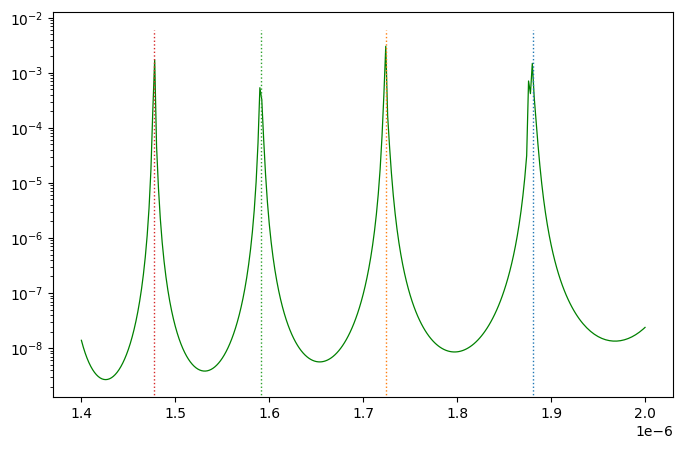

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

ax.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
ym,yM = ax.get_ylim()
for l in ls:
    ax.plot([l,l], [0, yM],  linewidth=1, linestyle=':')

In [19]:
np.save('/home/pv/local/convergence/bragg_fiber/wavelength/N3/exact_scaled_betas', betas1)

In [18]:
A.scale

1.5e-05